In [2]:
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/Hawaii.sqlite", echo=False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

# # reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# View all of the classes that automap found
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.

#date = session.query(measurement.date,measurement.prcp).order_by(measurement.date.desc()).all()
date = max(session.query(measurement.date).all())
date

('2017-08-23',)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
date_last_12months = session.query(measurement.date, measurement.prcp).filter(measurement.date>'2016-08-22').order_by(measurement.date.desc()).all()


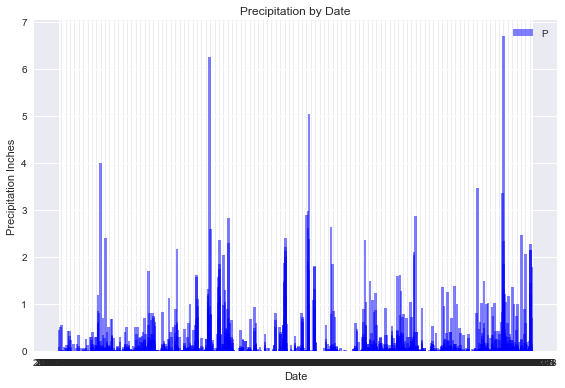

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
column_names = ['Date', "Precipitation"]
df_prcp = pd.DataFrame(date_last_12months,columns = column_names)
df_prcp.set_index('Date', inplace=True)
df_prcp
# # # Sort the dataframe by date
sort = df_prcp.sort_values(by='Date', ascending=False)
sort
# Use Pandas Plotting with Matplotlib to plot the data
prcp=df_prcp.reset_index()
prcp
# plt.figure(figsize=(20, 5))
# plt.xticks(rotation = 90)
plt.bar(prcp["Date"],prcp["Precipitation"], color ='blue',alpha = .5, align="center", width = 2)
plt.xlabel("Date")
plt.ylabel("Precipitation Inches")
plt.legend("Precipitation", loc = "upper right")
plt.title("Precipitation by Date")
plt.tight_layout()
plt.show()

In [14]:
prcp['Date'] = pd.to_datetime(prcp.Date)

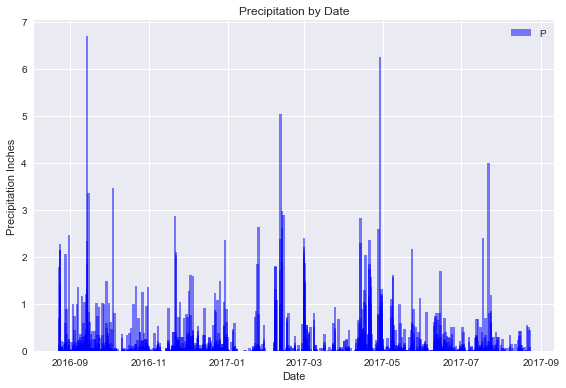

In [15]:
# plt.xticks(rotation = 90)
plt.bar(prcp["Date"],prcp["Precipitation"], color ='blue',alpha = .5, align="center", width = 2)
plt.xlabel("Date")
plt.ylabel("Precipitation Inches")
plt.legend("Precipitation", loc = "upper right")
plt.title("Precipitation by Date")
plt.tight_layout()
plt.show()



In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp_agg = df_prcp.groupby("Date").aggregate(['mean', 'median', 'var', 'std','sem'])
#round(df_prcp_agg["Date"],2)
df_prcp_agg
df_prcp.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(station.id).count()
num_stations

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.date)).group_by(measurement.station).order_by(func.count(measurement.date)).all()


[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max=max(session.query(measurement.tobs).filter(measurement.station=='USC00519281').all())
min=min(session.query(measurement.tobs).filter(measurement.station=='USC00519281').all())
avg=session.query(func.avg(measurement.tobs).label('average')).filter(measurement.station=='USC00519281').all()
print(min,max,avg)

(54.0,) (85.0,) [(71.66378066378067,)]


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_12months = session.query(measurement.date, measurement.tobs,measurement.station).filter(measurement.station=='USC00519281').filter(measurement.date>'2016-08-17').order_by(measurement.date.desc()).all()
station_12months

[('2017-08-18', 79.0, 'USC00519281'),
 ('2017-08-17', 76.0, 'USC00519281'),
 ('2017-08-16', 76.0, 'USC00519281'),
 ('2017-08-15', 77.0, 'USC00519281'),
 ('2017-08-14', 77.0, 'USC00519281'),
 ('2017-08-13', 77.0, 'USC00519281'),
 ('2017-08-06', 83.0, 'USC00519281'),
 ('2017-08-05', 82.0, 'USC00519281'),
 ('2017-08-04', 77.0, 'USC00519281'),
 ('2017-07-31', 76.0, 'USC00519281'),
 ('2017-07-30', 81.0, 'USC00519281'),
 ('2017-07-29', 82.0, 'USC00519281'),
 ('2017-07-28', 81.0, 'USC00519281'),
 ('2017-07-27', 76.0, 'USC00519281'),
 ('2017-07-26', 75.0, 'USC00519281'),
 ('2017-07-25', 77.0, 'USC00519281'),
 ('2017-07-24', 75.0, 'USC00519281'),
 ('2017-07-23', 82.0, 'USC00519281'),
 ('2017-07-22', 77.0, 'USC00519281'),
 ('2017-07-21', 77.0, 'USC00519281'),
 ('2017-07-20', 77.0, 'USC00519281'),
 ('2017-07-19', 76.0, 'USC00519281'),
 ('2017-07-18', 76.0, 'USC00519281'),
 ('2017-07-17', 76.0, 'USC00519281'),
 ('2017-07-16', 80.0, 'USC00519281'),
 ('2017-07-15', 80.0, 'USC00519281'),
 ('2017-07-1

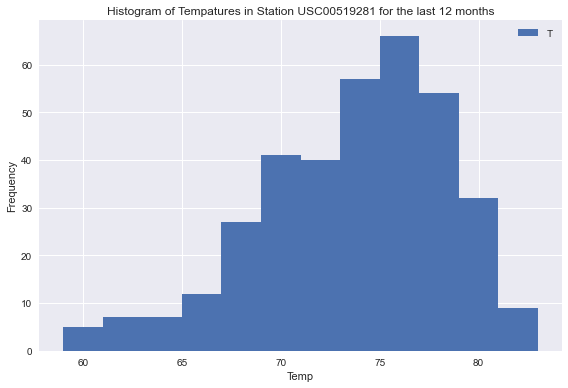

In [21]:
column_names = ['Date', "Temperture","Station"]
df_station= pd.DataFrame(station_12months,columns = column_names)
# df_prcp.set_index('Date', inplace=True)
df_station

#  Sort the dataframe by date
sort = df_station.sort_values(by='Date', ascending=False)
sort
# # Use Pandas Plotting with Matplotlib to plot the data


hist = df_station.hist(bins=12)
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.legend("Tobs", loc = "upper right")
plt.title("Histogram of Tempatures in Station USC00519281 for the last 12 months")
plt.tight_layout()
plt.show()

In [22]:
temp_query = session.query(func.min(measurement.tobs).label("TMIN"),func.max(measurement.tobs).label("TMAX"),\
                    func.avg(measurement.tobs).label("TAVG")).filter(measurement.date>='2013-01-01').all()
temp_query

[(53.0, 87.0, 73.53989291670324)]

In [23]:
dt.datetime.strptime('01102015','%d%m%Y')

datetime.datetime(2015, 1, 10, 0, 0)

In [24]:
temp_query = session.query(func.min(measurement.tobs).label("TMIN"),func.max(measurement.tobs).label("TMAX"),\
                    func.avg(measurement.tobs).label("TAVG")).filter(measurement.date>='2013-01-01').filter(measurement.date<='2015-01-10').all()
temp_query

[(53.0, 86.0, 72.86444486051302)]

In [25]:
temp_query = session.query(func.min(measurement.tobs).label("TMIN"),func.max(measurement.tobs).label("TMAX"),\
                    func.avg(measurement.tobs).label("TAVG")).filter(measurement.date>=dt.datetime.strptime('01012013','%d%m%Y')).filter(measurement.date<=dt.datetime.strptime('01102015','%d%m%Y')).all()

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2700605599.py, line 2)

# Close session

In [22]:
# Close Session
session.close()